###Import the Libraries.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

###Importing the dataset.

In [4]:
data = pd.read_csv("Titanic-Dataset.csv")

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###Checking for Null Values.

In [8]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
data.Age.fillna(data.Age.median(), inplace = True)

In [11]:
data.Cabin.fillna(data.Cabin.mode()[0], inplace = True)

In [12]:
data.Embarked.fillna(data.Embarked.mode()[0], inplace = True)

In [13]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


###Data Visualization.

<ipython-input-15-4cf58e2689cd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


<Axes: >

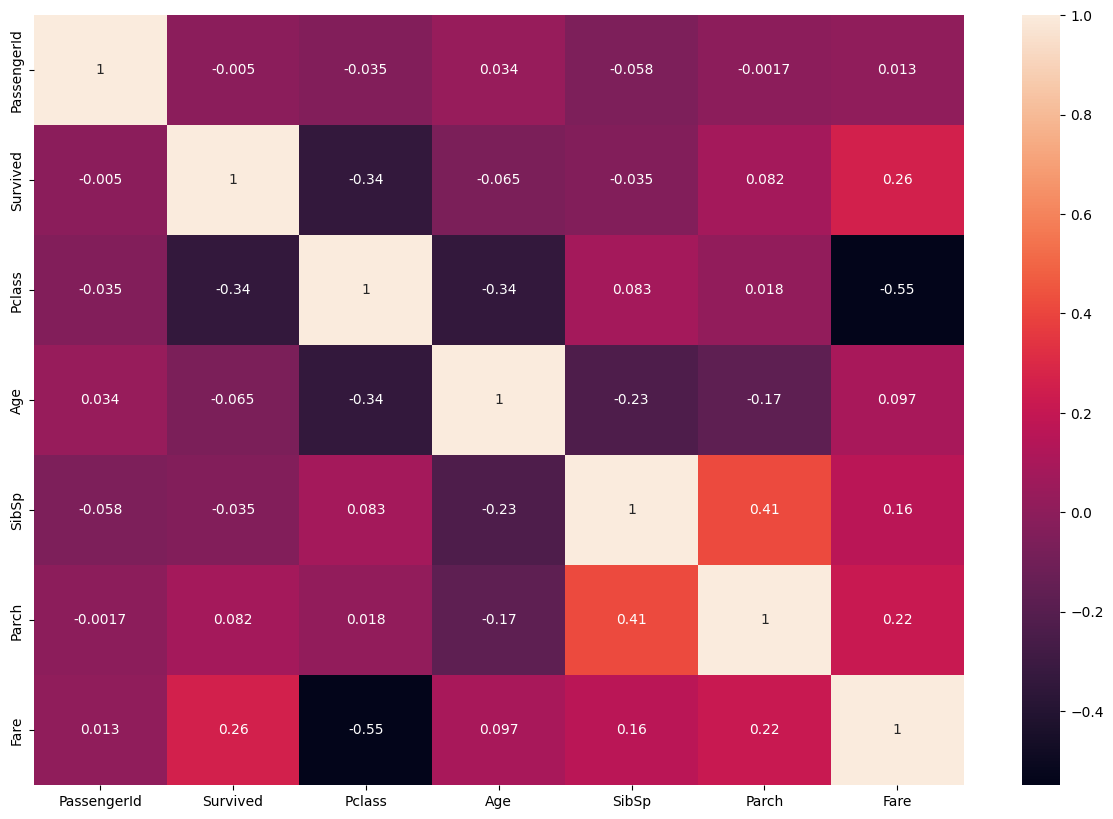

In [15]:
plt.subplots(figsize = (15,10))
sns.heatmap(data.corr(), annot = True)

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

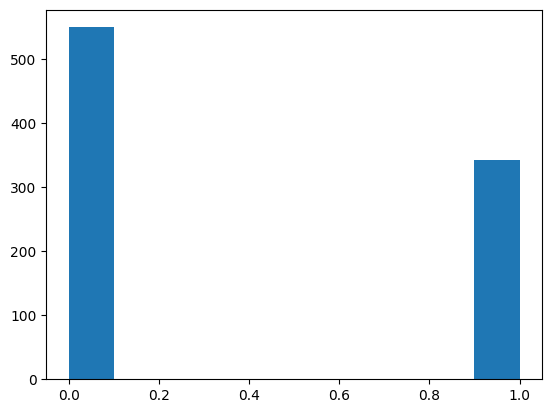

In [16]:
plt.hist(data.Survived, range = [0, 1])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

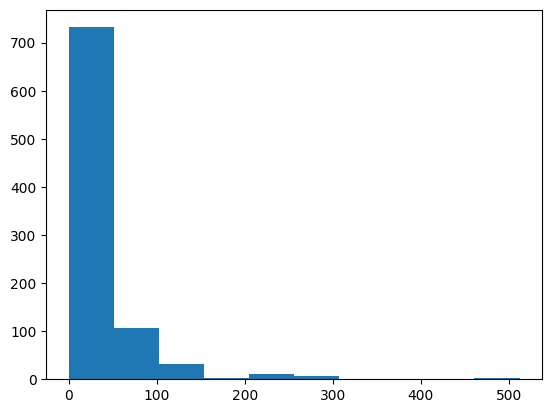

In [17]:
plt.hist(data.Fare)

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

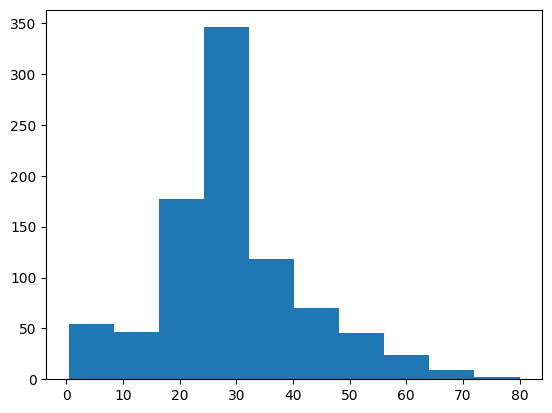

In [18]:
plt.hist(data.Age)

<Axes: ylabel='Survived'>

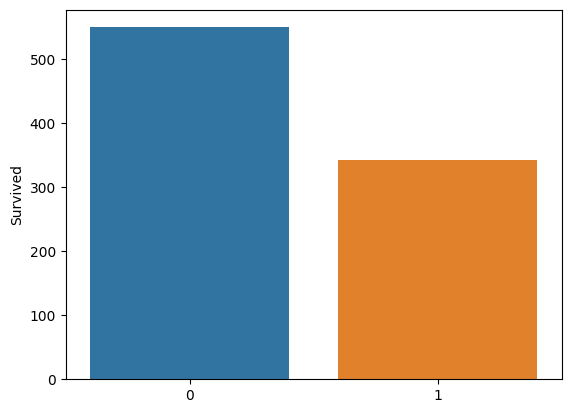

In [19]:
sns.barplot(x = data["Survived"].value_counts().index, y = data["Survived"].value_counts())

<Axes: ylabel='Pclass'>

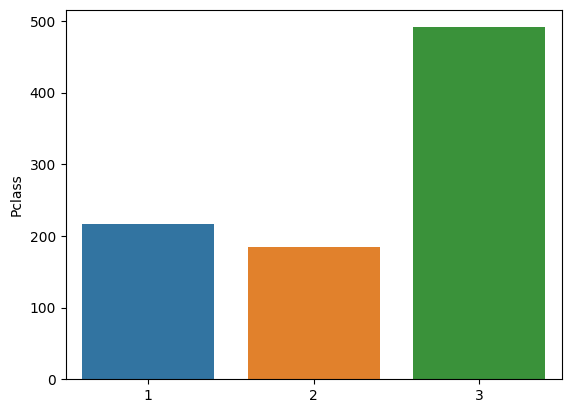

In [20]:
sns.barplot(x = data["Pclass"].value_counts().index, y = data["Pclass"].value_counts())

###Outlier Detection

<Axes: >

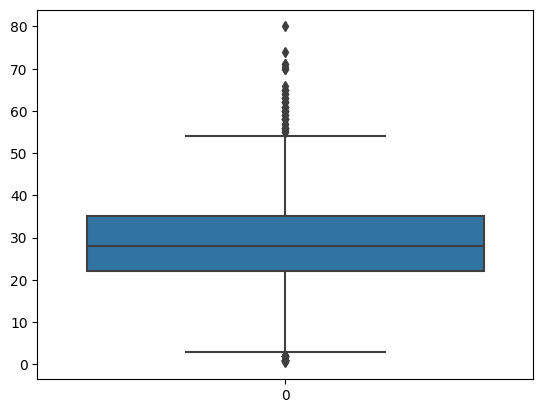

In [21]:
sns.boxplot(data.Age)

In [22]:
q1 = data.Age.quantile(0.25)
q3 = data.Age.quantile(0.75)

In [23]:
print(q1)
print(q3)

22.0
35.0


In [24]:
IQR = q3 - q1
IQR

13.0

In [25]:
upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR

In [26]:
print(upper_limit)
print(lower_limit)

54.5
2.5


In [27]:
data = data[data["Age"] < upper_limit]

In [28]:
data = data[data["Age"] > lower_limit]

<Axes: >

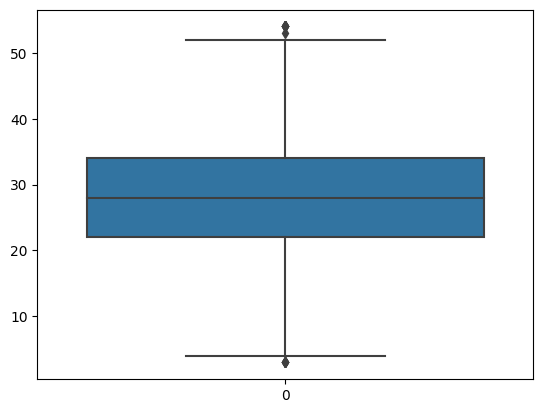

In [29]:
sns.boxplot(data.Age)

In [30]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


###Splitting Dependent and Independent variables

In [31]:
y = data.Survived

In [32]:
x = data.iloc[:, np.r_[2:3, 4:8, 9:12]]

In [33]:
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [34]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,B96 B98,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,B96 B98,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,B96 B98,S


In [35]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [36]:
x.Sex.value_counts()

male      531
female    294
Name: Sex, dtype: int64

In [37]:
le = LabelEncoder()

In [38]:
x.Sex = le.fit_transform(x.Sex)

<ipython-input-38-19e3d6984b85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Sex = le.fit_transform(x.Sex)


In [39]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,B96 B98,S
1,1,0,38.0,1,0,71.2833,C85,C
2,3,0,26.0,0,0,7.9250,B96 B98,S
3,1,0,35.0,1,0,53.1000,C123,S
4,3,1,35.0,0,0,8.0500,B96 B98,S


In [ ]:
x.Cabin.value_counts()

B96 B98        585
C23 C25 C27      4
G6               4
E101             3
D                3
              ... 
C7               1
C54              1
E36              1
C106             1
C148             1
Name: Cabin, Length: 126, dtype: int64

In [40]:
x.Cabin = le.fit_transform(x.Cabin)

<ipython-input-40-3ccfd4880612>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Cabin = le.fit_transform(x.Cabin)


In [41]:
x.Embarked.value_counts()

S    600
C    152
Q     73
Name: Embarked, dtype: int64

In [42]:
emb = pd.get_dummies(x.Embarked, drop_first = True)

In [43]:
emb

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [44]:
x = pd.concat([x, emb], axis = 1)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Q,S
0,3,1,22.0,1,0,7.2500,38,S,0,1
1,1,0,38.0,1,0,71.2833,69,C,0,0
2,3,0,26.0,0,0,7.9250,38,S,0,1
3,1,0,35.0,1,0,53.1000,45,S,0,1
4,3,1,35.0,0,0,8.0500,38,S,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,38,S,0,1
887,1,0,19.0,0,0,30.0000,22,S,0,1
888,3,0,28.0,1,2,23.4500,38,S,0,1
889,1,1,26.0,0,0,30.0000,50,C,0,0


In [45]:
x.drop(["Embarked"], axis=1, inplace = True)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Q,S
0,3,1,22.0,1,0,7.2500,38,0,1
1,1,0,38.0,1,0,71.2833,69,0,0
2,3,0,26.0,0,0,7.9250,38,0,1
3,1,0,35.0,1,0,53.1000,45,0,1
4,3,1,35.0,0,0,8.0500,38,0,1
...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,38,0,1
887,1,0,19.0,0,0,30.0000,22,0,1
888,3,0,28.0,1,2,23.4500,38,0,1
889,1,1,26.0,0,0,30.0000,50,0,0


###Feature Scaling.

In [46]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

In [47]:
x_scaled = pd.DataFrame(ms.fit_transform(x))

###Splitting Data into Train and Test

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.2, random_state = 0)

In [49]:
x_train.head()

,0,1,2,3,4,5,6,7,8
768,1.0,1.0,0.490196,0.000,0.0,0.014110,0.299213,0.0,0.0
116,1.0,1.0,0.411765,0.000,0.0,0.013940,0.299213,0.0,1.0
37,1.0,1.0,0.490196,0.000,0.0,0.015412,0.299213,0.0,0.0
732,0.5,1.0,0.254902,0.000,0.0,0.050749,0.299213,0.0,1.0
48,0.5,0.0,0.509804,0.125,0.0,0.050749,0.299213,0.0,1.0


In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lr = LinearRegression()